# DSCI 503 - Project 02
### Sean Kilfoy

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
The purpose of this code is to create a function that will generate sequences of simulated daily stock prices based on the current stock price, expected annual yield rate, annual volatility, and number of days. I will then return a sample plot of this simulation using arbitrary inputs.

In [2]:
def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc=rate/252, scale=vol/(252**0.5), size=days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    daily_prices = np.round(start * daily_multipliers, 2)
    prices = np.concatenate([[start], daily_prices])
    return prices

### Testing the function
Now, I will test the `simulate_stock` function.

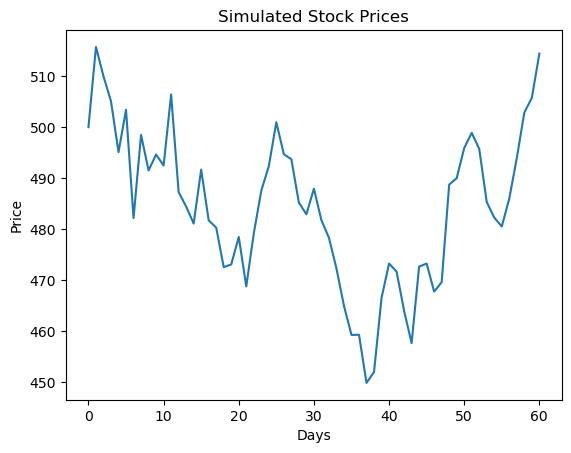

Final daily price: $514.44


In [3]:
np.random.seed(1)
run = simulate_stock(500, 0.08, 0.3, 60)
plt.plot(run)
plt.title("Simulated Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()
print("Final daily price: $", run[-1], sep='')

## Part B: Annual Yield Function
The purpose of this section is to create and test a function that calculates the annual yield for a stock during a simulated period.

In [4]:
def find_yield(run):
    days_in_run = len(run) - 1
    initial_price = run[0]
    final_price = run[-1]
    annual_yield = math.log(final_price / initial_price) * (252 / days_in_run)
    return round(annual_yield, 4)

### Testing the function
I will test the `find_yield` function by applying it to the `simulated_prices` from the run created in Part A.

In [5]:
np.random.seed(1)
run = simulate_stock(500, 0.08, 0.3, 60)
print(find_yield(run))

0.1196


### Exploring the variability of simulated runs
Next, I will explore the variability of the functions by simulating 25 runs.

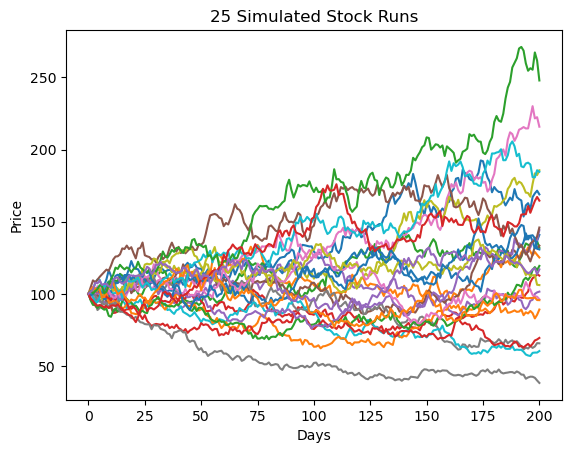

In [6]:
annual_yields = []
for i in range(25):
    run = simulate_stock(100, 0.06, 0.4, 200)
    run_yield = find_yield(run)
    annual_yields.append(run_yield)
    plt.plot(run)

plt.title("25 Simulated Stock Runs")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

Note the annual yields of these 25 simulated runs below. The table below will change after re-running the simulation above.

In [7]:
print("{:<10}{}".format("Run", "Annual Yield"))
for i, annual_yield in enumerate(annual_yields):
    print("{:<10}{}".format(i+1, annual_yield))

Run       Annual Yield
1         0.6611
2         0.2836
3         0.3501
4         0.1506
5         0.0198
6         0.3635
7         0.9697
8         -0.5283
9         0.7798
10        -0.6351
11        0.4319
12        -0.1446
13        0.2234
14        -0.4586
15        0.4608
16        0.4768
17        -0.0479
18        -1.2092
19        0.0748
20        0.7724
21        0.3386
22        -0.0558
23        1.1441
24        0.6283
25        0.1978


## Part C: Finding Seeds that Generate Specific Outcomes
In this part, I will explore the effect of the random seed on the results of the simulation by finding seeds that result in specific outcomes. I will define three stocks using the parameters current price, expected annual return, and volatility. I will create a loop to determine the first 5 seed values between 5555 and 6666 for which each of the stocks will result in having the highest price after 100 days. Then, I will display this plot this data.

In [25]:
stock_A = {"start": 78, "rate": 0.04, "vol": 1.2, "days": 100}
stock_B = {"start": 75, "rate": 0.08, "vol": 0.8, "days": 100}
stock_C = {"start": 72, "rate": 0.16, "vol": 0.6, "days": 100}
stock_A_seeds = []
stock_B_seeds = []
stock_C_seeds = []

for seed in range(5555,6666):
    np.random.seed(seed)
    stock_A_yield = find_yield(simulate_stock(**stock_A))
    stock_B_yield = find_yield(simulate_stock(**stock_B))
    stock_C_yield = find_yield(simulate_stock(**stock_C))
    
    if len(stock_A_seeds) < 5:
        if stock_A_yield == max(stock_A_yield, stock_B_yield, stock_C_yield):
            stock_A_seeds.append(seed)
    if len(stock_B_seeds) < 5:
        if stock_B_yield == max(stock_A_yield, stock_B_yield, stock_C_yield):
            stock_B_seeds.append(seed)
    if len(stock_C_seeds) < 5:
        if stock_C_yield == max(stock_A_yield, stock_B_yield, stock_C_yield):
            stock_C_seeds.append(seed)

print("{:<10}{}".format("Stock", "Seeds"))
print("{:<10}{}".format("A", stock_A_seeds))
print("{:<10}{}".format("B", stock_B_seeds))
print("{:<10}{}".format("C", stock_C_seeds))


Stock     Seeds
A         [5556, 5557, 5561, 5564, 5567]
B         [5558, 5559, 5560, 5562, 5565]
C         [5555, 5563, 5570, 5571, 5575]


In the cell below, I present subplots for the final 2 seed values in my lists above for which each stock has the highest final price after 100 days.

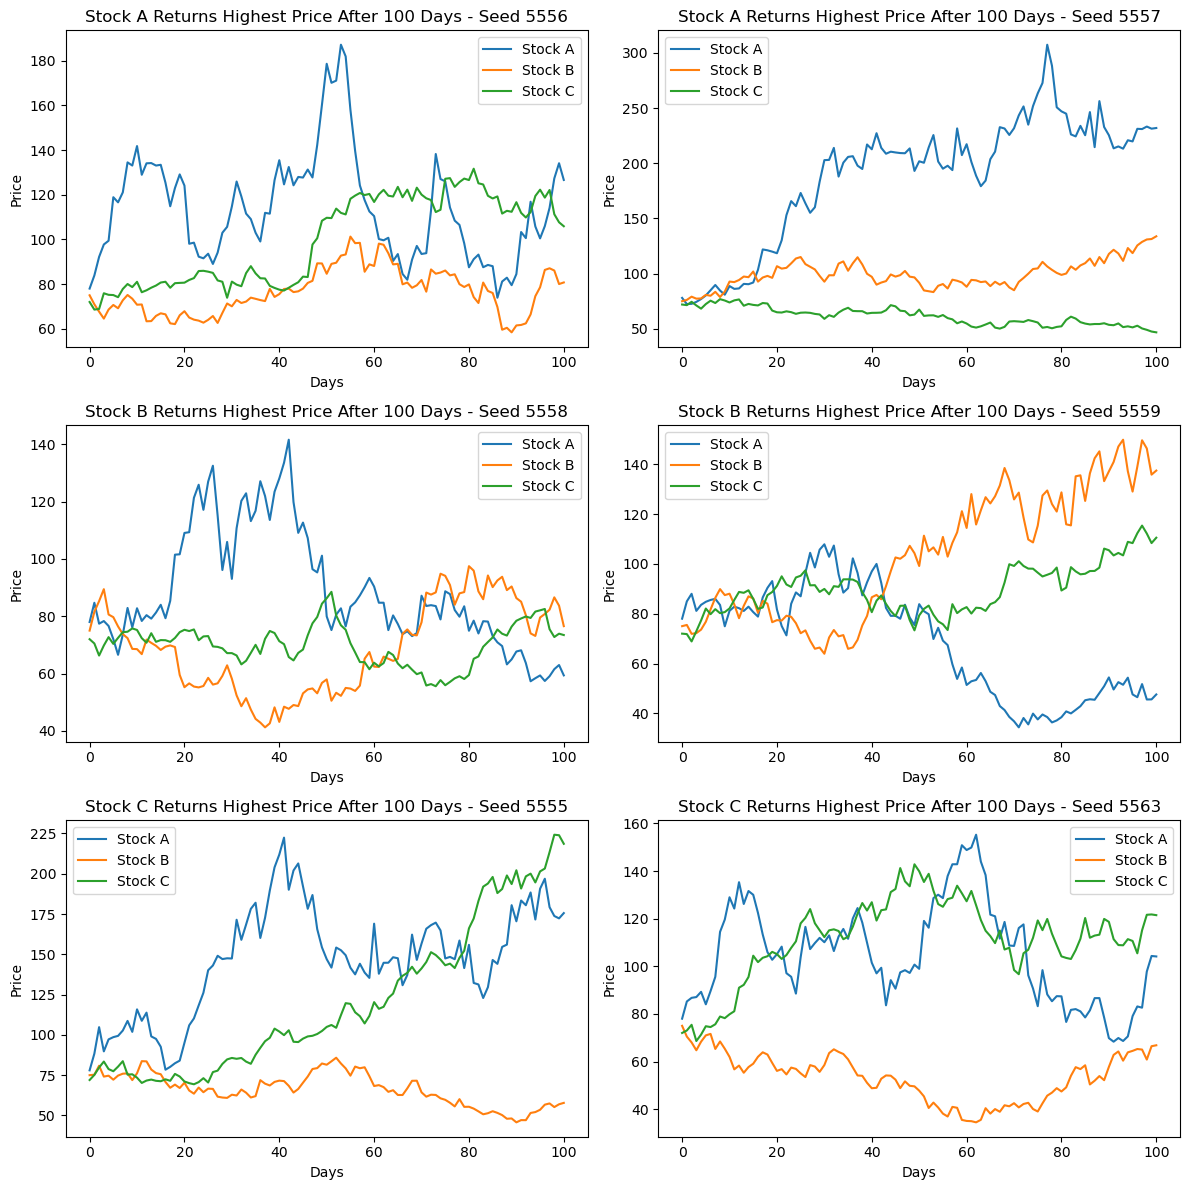

In [26]:
seeds = [stock_A_seeds[:2], stock_B_seeds[:2], stock_C_seeds[:2]]
titles = ["Stock A Returns Highest Price After 100 Days",
          "Stock B Returns Highest Price After 100 Days",
          "Stock C Returns Highest Price After 100 Days"]

fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for i, (seed, title) in enumerate(zip(seeds, titles)):
    for j, s in enumerate(seed):
        np.random.seed(s)
        run_A = simulate_stock(**stock_A)
        run_B = simulate_stock(**stock_B)
        run_C = simulate_stock(**stock_C)
        ax[i][j].plot(run_A, label="Stock A")
        ax[i][j].plot(run_B, label="Stock B")
        ax[i][j].plot(run_C, label="Stock C")
        ax[i][j].set_title("{} - Seed {}".format(title, s))
        ax[i][j].set_xlabel("Days")
        ax[i][j].set_ylabel("Price")
        ax[i][j].legend()

plt.tight_layout()
plt.show()

## Part D: Monte Carlo Simulation
In this part, I will perform a Monte Carlo simulation to estimate the range of possible outcomes for the final price of a stock.

In [ ]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    for i in range(num_runs):
        run = simulate_stock(start, rate, vol, days)
        final_prices.append(run[-1])
        annual_yields.append(find_yield(run))
    return np.array(final_prices), np.array(annual_yields)

### Testing the function
I will now test the `monte_carlo` function for 10,000 simulated runs on a stock with a current price of 200, a specific seed of 1, an expected annual return of 10%, and a volatility of 0.4, each run over a period of 500 days.

In [ ]:
np.random.seed(1)
final_prices, annual_yields = monte_carlo(200, 0.1, 0.4, 500, 10000)

plt.figure(figsize=[10,5])
plt.hist(final_prices, bins=np.arange(0, 1600, 50), edgecolor='black')
plt.title("Monte Carlo Distribution: Frequency of Simulated Final Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### Displaying the percentiles
I will now display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [ ]:
percentiles = np.percentile(final_prices, [10, 25, 50, 75, 90])

for i, p in enumerate(percentiles):
    print(f"{[10, 25, 50, 75, 90][i]}th percentile: {round(p, 2)}")

## Part E: Effects of Volatility
In this part, I will explore the effect of volatility on simulated stock prices. I will perform Monte Carlo simulations for two stocks to see the differences in their simulated annual yields and final prices.

In [ ]:
np.random.seed(1)

start = 100
rate = 0.12
vol_A = 0.3
vol_B = 0.7
days = 150
num_runs = 10000

final_prices_A, annual_yields_A = monte_carlo(start, rate, vol_A, days, num_runs)
final_prices_B, annual_yields_B = monte_carlo(start, rate, vol_B, days, num_runs)

print(f"Average Annual Yield for A over {num_runs} runs: {round(np.mean(annual_yields_A), 4)}")
print(f"Average Annual Yield for B over {num_runs} runs: {round(np.mean(annual_yields_B), 4)}")

Next, I will create histograms of the final prices to visually inspect the results of the Monte Carlo simulations. The histograms will display the distribution of final prices for each stock over the 10,000 simulated runs.

In [ ]:
plt.figure(figsize=[10,5])
plt.hist(final_prices_A, bins=np.arange(0,600, 10), alpha=0.6, edgecolor='black', label='Stock A')
plt.hist(final_prices_B, bins=np.arange(0,600, 10), alpha=0.6, edgecolor='black', label='Stock B')
plt.legend()
plt.title("Histogram of Final Prices over 10,000 Runs")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## Part F: Comparing Two Stocks
In this part, I will compare the final prices and annual yields of two stocks using Monte Carlo simulations.

In [ ]:
np.random.seed(1)

final_a, yields_a = monte_carlo(120, 0.08, 0.2, 252, 10000)
final_b, yields_b = monte_carlo(120, 0.05, 0.5, 252, 10000)

above_b = sum(final_a > final_b) / 10000
above_150_a = sum(final_a > 150) / 10000
above_150_b = sum(final_b > 150) / 10000
below_100_a = sum(final_a < 100) / 10000
below_100_b = sum(final_b < 100) / 10000

print("Proportion of runs in which:")
print("----------------------------")
print(f"A ends above B:   {round(above_b, 4)}")
print()
print(f"A ends above 150: {round(above_150_a, 4)}")
print(f"B ends above 150: {round(above_150_b, 4)}")
print()
print(f"A ends below 100: {round(below_100_a, 4)}")
print(f"B ends below 100: {round(below_100_b, 4)}")

## Part G: Expected Call Payoff
In this part, I will use a Monte Carlo simulation to estimate the expected payoff of a call option on a particular stock.

In [ ]:
np.random.seed(1)

start = 200
rate = 0.11
vol = 0.4
days = 150
num_runs = 10000

final_prices, _ = monte_carlo(start, rate, vol, days, num_runs)
call_payoff = np.where(final_prices - 225 > 0, final_prices - 225, 0)
expected_call_payoff = np.mean(call_payoff)

print(f"Average call payoff: ${expected_call_payoff:.2f}")